In [ ]:
# Import essential libraries
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import xgboost as xg
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# import datasets
data = pd.read_csv('TF-IDF.csv')
data

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi,label_class
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
804,804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
805,805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
806,806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif


In [ ]:
# convert values column label_class from str to int 

data.replace(to_replace ="Negatif", value = 1, inplace = True)
data.replace(to_replace ="Positif", value = 2, inplace = True)
# data.replace(to_replace ="Positive", value = 3, inplace = True)

data

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi,label_class
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
804,804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
805,805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
806,806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
data.dtypes

Unnamed: 0       int64
abortion       float64
absorb         float64
abuse          float64
abusing        float64
                ...   
young          float64
younger        float64
youth          float64
yupi           float64
label_class      int64
Length: 1681, dtype: object

# Spilitting Datasets

In [ ]:
#splitting datasets
X = data.iloc[:, :-1]
y = data['label_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# converting column without decimal to integer train datasets
for col in X_train.columns:
    if np.sum((X_train[col] - X_train[col].astype('int'))) == 0:
        X_train[col] = X_train[col].astype('int')


# converting column without decimal to integer train datasets
for col in X_test.columns:
    if np.sum((X_test[col] - X_test[col].astype('int'))) == 0:
        X_test[col] = X_test[col].astype('int')


### Train Datasets

In [ ]:
print(f'Number of rows: {X_train.shape[0]};  Number of columns: {X_train.shape[1]}; No of missing values: {sum(X_train.isna().sum())}')

Number of rows: 646;  Number of columns: 1680; No of missing values: 0


In [ ]:
X_train.head()

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,yasin,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi
238,238,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
232,232,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
711,711,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
460,460,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
128,128,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [ ]:
X_train.dtypes

Unnamed: 0      int64
abortion      float64
absorb          int64
abuse         float64
abusing       float64
               ...   
yosua           int64
young         float64
younger       float64
youth         float64
yupi          float64
Length: 1680, dtype: object

In [ ]:
y_train.isna().sum()

0

In [ ]:
y_train.dtypes

dtype('int64')

### Test Datasets

In [ ]:
X_test.head()

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,yasin,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi
64,64,0,0.00,0.0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.00
123,123,0,0.00,0.0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.38
567,567,0,0.27,0.0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.00
30,30,0,0.00,0.0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.00
120,120,0,0.00,0.0,0,0,0,0,0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.00


In [ ]:
print(f'Number of rows: {X_test.shape[0]};  Number of columns: {X_test.shape[1]}; No of missing values: {sum(X_test.isna().sum())}')

Number of rows: 162;  Number of columns: 1680; No of missing values: 0


In [ ]:
X_test.dtypes

Unnamed: 0      int64
abortion        int64
absorb        float64
abuse         float64
abusing         int64
               ...   
yosua         float64
young         float64
younger         int64
youth           int64
yupi          float64
Length: 1680, dtype: object

In [ ]:
y_test.dtypes

dtype('int64')

In [ ]:
y_test.isna().sum()

0

In [ ]:
y_test.head()

64     1
123    2
567    1
30     1
120    1
Name: label_class, dtype: int64

# Feature Selection menggunakan PSO

In [ ]:
# creating an array of X (Features) and y (Targets)
X_train = X_train.drop(['Unnamed: 0'], axis=1).values
y_train = y_train.values

In [ ]:
# scaling features to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496],
       [-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496],
       [-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496],
       ...,
       [-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496],
       [-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496],
       [-0.05572782,  0.        , -0.09585306, ..., -0.05373098,
        -0.0672193 , -0.03937496]])

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (646, 1679)
Shape of y_train: (646,)


# Error Rate
Fungsi sederhana untuk mengukur kesalahan subste fitur yang dipilih. parameter input: x_train, y_train, x, opts.

x adalah array yang sama dengan jumlah fitur, array ini bernilai 0 dan 1, 0 menunjukkan bahwa fitur tidak dipilih berdasarkan indeks dan 1 menunjukkan bahwa fitur dipilih.

opts : fungi ini membuat x_train dan y_train berdasarkan subset fitur (x) dan kemudian melatih model dengan fitur ini dan mengukur kesalahannya.

In [ ]:
# initial error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = svm.SVC()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    # akurasi = accuracy_score(yvalid, ypred)
    
    return error
    # return akurasi

# Fun Function
fungsi ini digunakan untuk mendapatkan error berdasarkan fitur yang dipilih menggunakan fungsi error dan kemudian menghitung objective function

In [ ]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

# Initial Position
fungsi ini akan membangun N (jumlah populasi) array dengan ukuran fitur dan diinisialisasi secarak antara 0-1

In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

# Initial Velocity
fungsi untuk menginisialisasi velocity setiap partikel secara acak antara [-Vmax, Vmax]. pemilihan kecepatan berdasarkan batas bawah dan batas bawah yaitu nol (0) atau satu (1) 

In [ ]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

In [ ]:

def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [ ]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [ ]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float') 
    Xgb   = np.zeros([1, dim], dtype='float') 
    fitG  = float('inf') 
    Xpb   = np.zeros([N, dim], dtype='float') 
    fitP  = float('inf') * np.ones([N, 1], dtype='float') 
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}


# perform feature selection
start_time = time.time()
fmdl  = jfs(X_train, y_train, opts)
print("Run Time --- %s seconds ---" % (time.time() - start_time))

sf    = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Iteration: 1
Best (PSO): 0.32275965840491755
Iteration: 2
Best (PSO): 0.32275965840491755
Iteration: 3
Best (PSO): 0.3146871905131247
Iteration: 4
Best (PSO): 0.3144370416149711
Iteration: 5
Best (PSO): 0.3063999790018022
Iteration: 6
Best (PSO): 0.3063999790018022
Iteration: 7
Best (PSO): 0.3063999790018022
Iteration: 8
Best (PSO): 0.3063999790018022
Iteration: 9
Best (PSO): 0.3063999790018022
Iteration: 10
Best (PSO): 0.3063999790018022
Iteration: 11
Best (PSO): 0.3063999790018022
Iteration: 12
Best (PSO): 0.3063999790018022
Iteration: 13
Best (PSO): 0.3063999790018022
Iteration: 14
Best (PSO): 0.3063821112233627
Iteration: 15
Best (PSO): 0.3063523315926301
Iteration: 16
Best (PSO): 0.30622130121740676
Iteration: 17
Best (PSO): 0.30622130121740676
Iteration: 18
Best (PSO): 0.30622130121740676
Iteration: 19
Best (PSO): 0.30622130121740676
Iteration: 20
Best (PSO): 0.29780243216536095
Iteration: 21
Best (PSO): 0.29778456438692136
Iteration: 22
Best (PSO): 0.29778456438692136
Iteration:

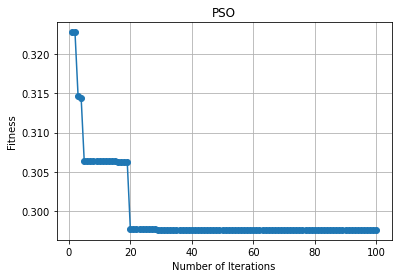

In [ ]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [ ]:
fmdl['sf']

array([   1,    2,    6,    7,    8,    9,   11,   12,   14,   16,   17,
         24,   26,   27,   28,   29,   31,   33,   35,   39,   41,   43,
         44,   45,   46,   53,   56,   57,   58,   64,   66,   67,   68,
         71,   73,   76,   80,   84,   86,   87,   92,   93,   94,  100,
        102,  103,  105,  107,  108,  109,  110,  117,  118,  122,  124,
        127,  129,  130,  132,  133,  135,  139,  145,  146,  148,  150,
        151,  153,  161,  162,  165,  166,  170,  171,  174,  178,  179,
        185,  191,  194,  195,  196,  197,  198,  200,  204,  205,  210,
        212,  213,  217,  218,  221,  225,  226,  227,  228,  229,  230,
        233,  235,  236,  238,  240,  243,  245,  247,  253,  255,  257,
        258,  259,  261,  263,  264,  265,  266,  268,  269,  273,  274,
        275,  276,  278,  280,  281,  283,  286,  288,  289,  291,  292,
        293,  297,  298,  300,  301,  302,  303,  304,  307,  308,  312,
        313,  316,  317,  318,  319,  321,  322,  3

### Klasifikasi SVM terhadap selected features

In [ ]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

# melatih model dengan data train
mdl       = svm.SVC()
mdl.fit(x_train, y_train)

# prediksi ytest berdasarkan xtest
y_pred    = mdl.predict(x_valid)

# accuracy
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)
Accuracy = accuracy_score(y_valid, y_pred)
print ("Accuracy:", Accuracy)
print("Precision Score : ", precision_score(y_valid, y_pred))
print("Recall Score : ", recall_score(y_valid, y_pred))
print("F-1 Score : ", f1_score(y_valid, y_pred))

RMSE: 0.2960217322754893
Accuracy: 0.9123711340206185
Precision Score :  0.9044943820224719
Recall Score :  1.0
F-1 Score :  0.9498525073746312


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

### Evaluasi

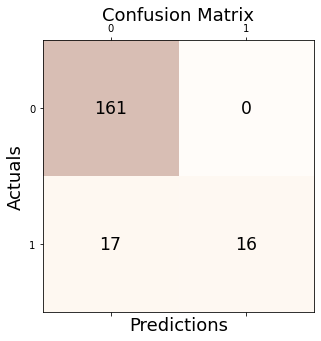

In [ ]:
#evaluasi dengan confusion matrix


# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()